In [1]:
%load_ext autoreload
%autoreload 2
from utils.utils import *
from utils.utils_train import *
from utils.utils_imports import *

In [2]:
# Load SBERT Embeddings
queries, query_embeddings, product_embeddings = load_raw_queries()

# load ids_toys from disk
with open('output/ids_toys.pkl', 'rb') as file:
    ids_toys = pickle.load(file)
    print(f"len(ids_toys): {len(ids_toys)}")
    ids_present = [_id for _id in ids_toys if _id in query_embeddings]

# Assemble qb & xb input embeddings
qb = torch.stack([torch.tensor(query_embeddings[_id]) for _id in ids_present])
xb = torch.tensor(np.array([product_embeddings[_id] for _id in ids_present]))

# Split Dataset into Train and Test
(qb_train, qb_test), (xb_train, xb_test), (idx_train, idx_test) = shuffle_and_split(qb, xb, seed=12)
print(f'len(qb_train): {len(qb_train)}')
print(f'len(qb_test): {len(qb_train)}')


loaded (queries, query_embeddings, product_embeddings) from  output/raw_queries.pkl
84373
qb_train.shape: torch.Size([20560, 768])
qb_test.shape: torch.Size([5140, 768])


In [3]:
# Two-Tower Pytorch Model
d = hidden_dim = qb_train.shape[-1]
list_recall3 = []
list_test_epochs = []

# Initialize the network
model = TwoTowerNetwork(d, hidden_dim) 
# [print(f"{key:16s}: {val}") for key, val in config.items()]
# print()
# print(model)
# model.size()

dropout         : 0.1
learning_rate   : 0.001
label_smoothing : 0.3
batch_size      : 1024
eval_iter       : 1

TwoTowerNetwork(
  (qb_tower): Sequential(
    (0): Linear(in_features=768, out_features=768, bias=False)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=768, out_features=768, bias=False)
    (4): Dropout(p=0.1, inplace=False)
  )
  (xb_tower): Sequential(
    (0): Linear(in_features=768, out_features=768, bias=False)
    (1): ReLU()
    (2): Dropout(p=0.1, inplace=False)
    (3): Linear(in_features=768, out_features=768, bias=False)
    (4): Dropout(p=0.1, inplace=False)
  )
)
num_params:2.36 million 


recall@3 = 0.030                    
recall@3 = 0.040                    
recall@3 = 0.055                    
recall@3 = 0.096                    
recall@3 = 0.077                    
recall@3 = 0.073                    
recall@3 = 0.155                    
recall@3 = 0.249                    
recall@3 = 0.298                    
recall@3 = 0.324                    
recall@3 = 0.384                    
recall@3 = 0.324                    
recall@3 = 0.366                    
recall@3 = 0.498                    
recall@3 = 0.486                    
recall@3 = 0.547                    
recall@3 = 0.540                    
recall@3 = 0.547                    
recall@3 = 0.538                    
recall@3 = 0.606                    
recall@3 = 0.645                    
recall@3 = 0.640                    
recall@3 = 0.663                    
recall@3 = 0.677                    
recall@3 = 0.682                    


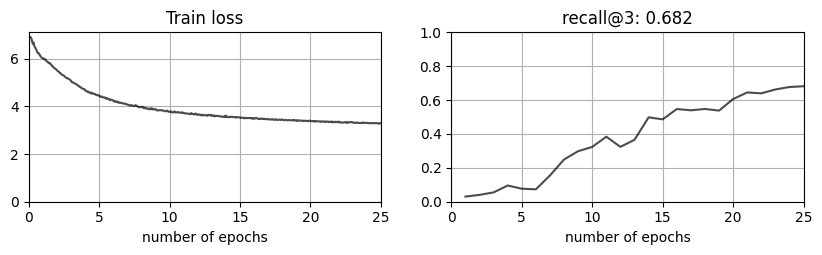

recall@3 = 0.680                    
recall@3 = 0.643                    
recall@3 = 0.672                    
recall@3 = 0.710                    
recall@3 = 0.664                    
recall@3 = 0.689                    
recall@3 = 0.694                    
recall@3 = 0.718                    
recall@3 = 0.708                    
recall@3 = 0.726                    
recall@3 = 0.708                    
recall@3 = 0.721                    
recall@3 = 0.733                    
recall@3 = 0.719                    
recall@3 = 0.729                    
recall@3 = 0.747                    
recall@3 = 0.716                    
recall@3 = 0.745                    
recall@3 = 0.749                    
recall@3 = 0.747                    
recall@3 = 0.729                    
recall@3 = 0.755                    
recall@3 = 0.732                    
recall@3 = 0.740                    
recall@3 = 0.748                    


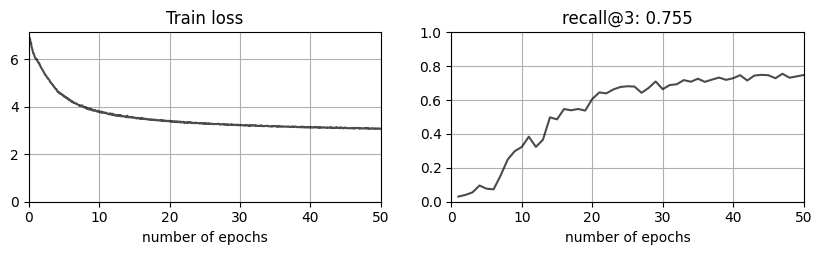

recall@3 = 0.761                    
recall@3 = 0.752                    
recall@3 = 0.759                    
recall@3 = 0.747                    
recall@3 = 0.753                    
recall@3 = 0.747                    
recall@3 = 0.764                    
recall@3 = 0.757                    
recall@3 = 0.749                    
recall@3 = 0.776                    
recall@3 = 0.740                    
recall@3 = 0.756                    
recall@3 = 0.749                    
recall@3 = 0.743                    
recall@3 = 0.755                    
recall@3 = 0.737                    
recall@3 = 0.747                    
recall@3 = 0.730                    
recall@3 = 0.736                    
recall@3 = 0.746                    
recall@3 = 0.752                    
recall@3 = 0.762                    
recall@3 = 0.747                    
recall@3 = 0.744                    
recall@3 = 0.746                    


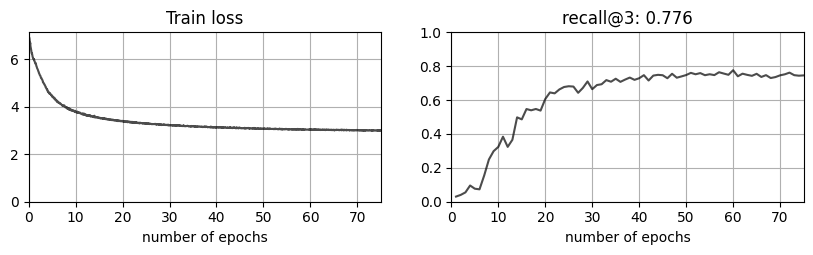

recall@3 = 0.743                    
recall@3 = 0.739                    
recall@3 = 0.742                    
recall@3 = 0.758                    
recall@3 = 0.743                    
recall@3 = 0.746                    
recall@3 = 0.751                    
recall@3 = 0.731                    
recall@3 = 0.748                    
recall@3 = 0.749                    
recall@3 = 0.746                    
recall@3 = 0.739                    
recall@3 = 0.745                    
recall@3 = 0.760                    
recall@3 = 0.743                    
recall@3 = 0.752                    
recall@3 = 0.748                    
recall@3 = 0.749                    
recall@3 = 0.736                    
recall@3 = 0.749                    
recall@3 = 0.764                    
recall@3 = 0.742                    
recall@3 = 0.741                    
recall@3 = 0.732                    
recall@3 = 0.737                    


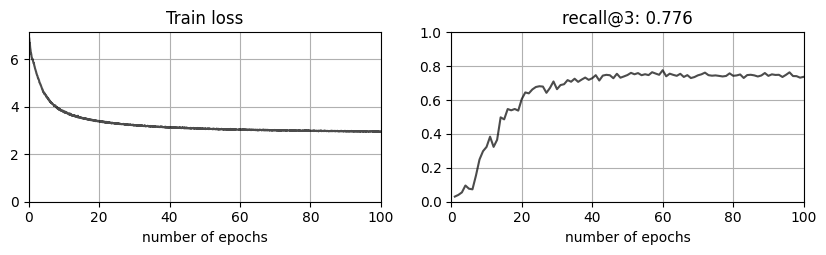

recall@3 = 0.765                    
recall@3 = 0.759                    
recall@3 = 0.742                    
recall@3 = 0.736                    
recall@3 = 0.746                    
recall@3 = 0.754                    
recall@3 = 0.733                    
recall@3 = 0.732                    
recall@3 = 0.753                    
recall@3 = 0.744                    
recall@3 = 0.731                    
recall@3 = 0.739                    
recall@3 = 0.727                    
recall@3 = 0.742                    
recall@3 = 0.737                    
recall@3 = 0.732                    
recall@3 = 0.736                    
recall@3 = 0.738                    
recall@3 = 0.747                    
recall@3 = 0.748                    
recall@3 = 0.739                    
recall@3 = 0.738                    
recall@3 = 0.753                    
recall@3 = 0.737                    
recall@3 = 0.754                    


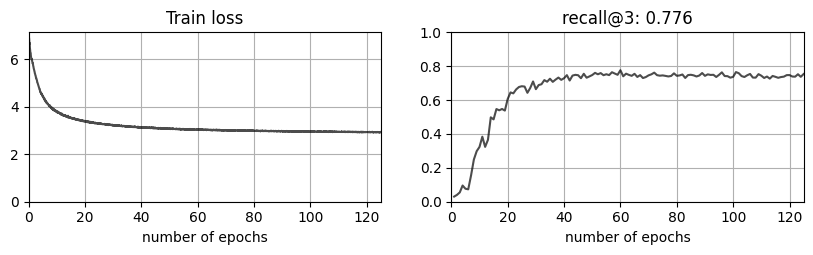

recall@3 = 0.747                    
recall@3 = 0.741                    
recall@3 = 0.729                    


In [ ]:
## TRAIN
# Hyperparameters
num_epochs = 1

for i in range(500):

    # reshuffle the trainset at beginning of each epoch
    (qb_train, _), (xb_train, _), (_) = shuffle_and_split(qb_train, xb_train, split=1)

    # train for 1 epoch
    model.fit(qb_train, xb_train, num_epochs)

    # write output embeddings to use for eval
    write_output_embeddings(model, qb_test, xb_test) 

    # run eval
    os.system('cd utils && python3 utils_infer.py')

    # read recall@3 metric written to json file
    with open('output/recall3.json', 'r') as file:
        recall3 = json.load(file)['recall3']

    # monitor metrics to plot recall.
    list_test_epochs.append(model.epochs[-1])
    list_recall3.append(recall3) 

    if (i+1) % 25 == 0:
        model.plot(qb_train, list_test_epochs, list_recall3) 

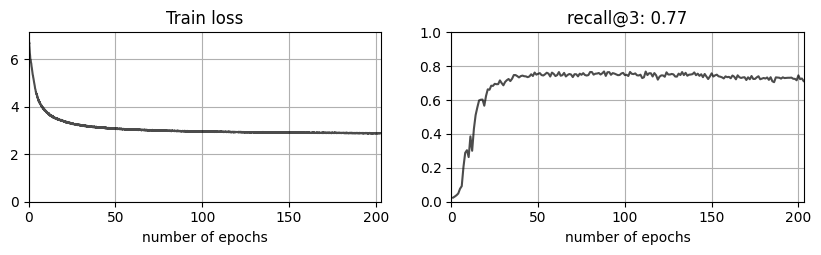

In [5]:
model.plot(qb_train, list_test_epochs, list_recall3)


In [ ]:
# TODO:
# 1. Incorporate a learning_rate scheduler
# 2. print the top 3 results for hits. 
# 3. naive baseline on SBERT embeddings recall@3 = 0.745
# 4. 

In [10]:
write_output_embeddings(model, qb_test, xb_test) 
os.system('cd utils && python3 utils_infer.py')


### The End

In [ ]:
# Load queries, ids_toys, ids_present
with open('output/raw_queries.pkl', 'rb') as file:
    queries, _, _ = pickle.load(file)

with open('output/ids_toys.pkl', 'rb') as file:
    ids_toys = pickle.load(file)
    ids_present = [_id for _id in ids_toys if _id in query_embeddings]


In [5]:
top_ids = [ids_present[idx_test[i]] for i in I[0]]
names = [info[_id]['name'] for _id in top_ids]
details = [info[_id]['details'] for _id in top_ids]
description = [info[_id]['description'] for _id in top_ids]
queries[ids_present[idx_test[0]]]

"I need to buy a Super-duper Tutu/Cape/Mask set in size 4-6 for my 4-6-year-old. It's a 3-piece set perfect for little Superheroines and Rock Stars!"